In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [3]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)
    
    return df

In [4]:
df_1998 = pd.read_csv('../data/clean/1998_Election_Data.csv')
df_2002 = pd.read_csv('../data/clean/2002_Election_Data.csv')
df_2006 = pd.read_csv('../data/clean/2006_Election_Data.csv')
df_2010 = pd.read_csv('../data/clean/2010_Election_Data.csv')
df_2014 = pd.read_csv('../data/clean/2014_Election_Data.csv')
df_2018 = pd.read_csv('../data/clean/2018_Election_Data.csv')
df_2018

,Unnamed: 0,election_year,election_round,place_(zz_=_exterior),municipality_code,municipality_name,office,party_number,party_initials,party_name,number_of_votes
0,0,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,2609
1,1,2018,1,ZZ,98540,CHINA,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,103
2,2,2018,1,ZZ,98086,EGITO,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,21
3,3,2018,1,ZZ,11568,URUGUAI,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,8
4,4,2018,1,ZZ,29378,SERVIA,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,12
...,...,...,...,...,...,...,...,...,...,...,...
1534,1534,2018,1,ZZ,11142,ARGENTINA,Presidente,19,PODE,PODEMOS,46
1535,1535,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,54,PPL,PARTIDO PATRIA LIVRE,4
1536,1536,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,19,PODE,PODEMOS,39
1537,1537,2018,1,ZZ,11282,FRANCA,Presidente,19,PODE,PODEMOS,30


In [5]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined

Aggregate Data


,Unnamed: 0,election_year,election_round,place_(zz_=_exterior),municipality_code,municipality_name,office,party_initials,party_number,party_name,number_of_votes,unnamed:_4
0,0,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PSDC,27,PARTIDO SOCIAL DEMOCRATA CRISTAO,1,NaN
1,1,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PT do B,70,PARTIDO TRABALHISTA DO BRASIL,3,NaN
2,2,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PT,13,PARTIDO DOS TRABALHADORES,10,NaN
3,3,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PSDB,45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,54,NaN
4,4,1998,1,ZZ,11100,ALEMANHA,PRESIDENTE,PTN,19,PARTIDO TRABALHISTA NACIONAL,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1534,2018,1,ZZ,11142,ARGENTINA,Presidente,PODE,19,PODEMOS,46,NaN
5593,1535,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,PPL,54,PARTIDO PATRIA LIVRE,4,NaN
5594,1536,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,PODE,19,PODEMOS,39,NaN
5595,1537,2018,1,ZZ,11282,FRANCA,Presidente,PODE,19,PODEMOS,30,NaN


In [6]:
def plot_total_votes(df):
    '''
    Plots the Total Brazilian Immigrant Electorate by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Quantity of Voters By Year
    voters = df[["election_year", "number_of_votes"]].groupby("election_year").sum()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(voters.size),
        height=voters["number_of_votes"],
        tick_label=voters.index, 
        color = 'g'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Electorate Population")
    plt.title("Brazilian Immigrant Voting Numbers by Year")

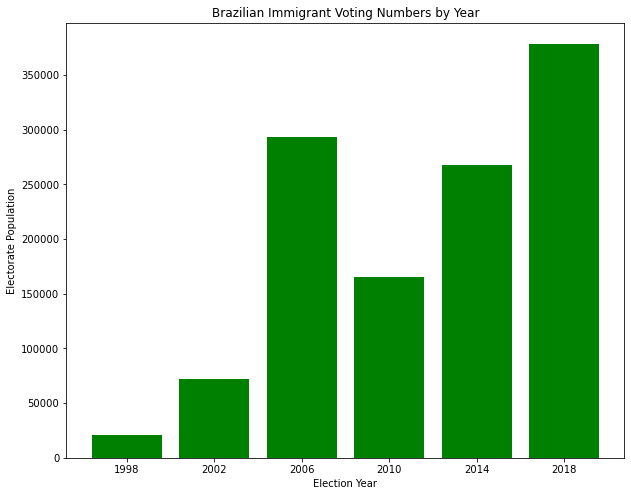

In [7]:
plot_total_votes(df_combined)

In [8]:
def plot_total_countries(df):
    '''
    Plots the Number of Countries in which the Electorate Resides by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Number of Unique Countries by Year
    countries = df[["election_year", "municipality_code"]].groupby("election_year").nunique()

    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(countries.size),
        height=countries["municipality_code"],
        tick_label=countries.index, 
        color = 'b'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Unique Country Count")
    plt.title("NUmber of Countries that saw Brazilian immigrants vote by Year")

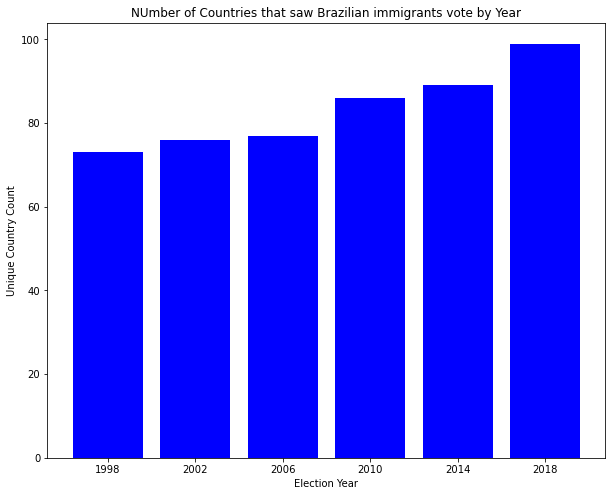

In [9]:
plot_total_countries(df_combined)

In [10]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries

In [11]:
countries = calculate_country_pop(df_combined)

In [12]:
countries1 = countries.sort_values(by=[1998], ascending=False)
countries1.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11800,BOLIVIA,1115.0,1562.0,4699.0,1935.0,2462.0,3080.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0


In [13]:
countries2 = countries.sort_values(by=[2002], ascending=False)
countries2.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0
11800,BOLIVIA,1115.0,1562.0,4699.0,1935.0,2462.0,3080.0


In [14]:
countries3 = countries.sort_values(by=[2006], ascending=False)
countries3.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11444,PARAGUAI,458.0,1332.0,10047.0,4547.0,6769.0,8450.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0


In [15]:
countries4 = countries.sort_values(by=[2010], ascending=False)
countries4.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11142,ARGENTINA,424.0,1088.0,7732.0,4577.0,5431.0,6856.0


In [16]:
countries5 = countries.sort_values(by=[2014], ascending=False)
countries5.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11444,PARAGUAI,458.0,1332.0,10047.0,4547.0,6769.0,8450.0


In [17]:
countries6 = countries.sort_values(by=[2018], ascending=False)
countries6.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11240,ESPANHA,341.0,1547.0,5235.0,3853.0,6143.0,10937.0


In [18]:
def votes_by_party(df):
    countries = df.groupby(["party_number", "party_name", "party_initials", "election_year"]).number_of_votes.sum().unstack()
    countries = countries.fillna(0)
    
    
    return countries

In [19]:
votings = votes_by_party(df_combined)
votings = votings.sort_values(by=[1998], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
23,PARTIDO POPULAR SOCIALISTA,PPS,1407.0,4342.0,0.0,0.0,0.0,0.0
56,PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,PRONA,307.0,0.0,0.0,0.0,0.0,0.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
70,PARTIDO TRABALHISTA DO BRASIL,PT do B,86.0,0.0,0.0,0.0,0.0,0.0
19,PARTIDO TRABALHISTA NACIONAL,PTN,85.0,0.0,0.0,0.0,0.0,0.0
33,PARTIDO DA MOBILIZACAO NACIONAL,PMN,61.0,0.0,0.0,0.0,0.0,0.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0


In [20]:
votings = votings.sort_values(by=[2002], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
23,PARTIDO POPULAR SOCIALISTA,PPS,1407.0,4342.0,0.0,0.0,0.0,0.0
40,PARTIDO SOCIALISTA BRASILEIRO,PSB,0.0,3675.0,0.0,0.0,34527.0,0.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
29,PARTIDO DA CAUSA OPERARIA,PCO,0.0,102.0,0.0,68.0,73.0,0.0
54,PARTIDO PATRIA LIVRE,PPL,0.0,0.0,0.0,0.0,0.0,153.0
15,MOVIMENTO DEMOCRATICO BRASILEIRO,MDB,0.0,0.0,0.0,0.0,0.0,952.0
17,PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0


In [21]:
votings = votings.sort_values(by=[2006], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
12,PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0
44,PARTIDO REPUBLICANO PROGRESSISTA,PRP,0.0,0.0,637.0,0.0,0.0,0.0
27,PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0
17,PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0
56,PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,PRONA,307.0,0.0,0.0,0.0,0.0,0.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0


In [22]:
votings = votings.sort_values(by=[2010], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
27,PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0
21,PARTIDO COMUNISTA BRASILEIRO,PCB,0.0,0.0,0.0,253.0,261.0,0.0
28,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,0.0,0.0,0.0,200.0,436.0,0.0
29,PARTIDO DA CAUSA OPERARIA,PCO,0.0,102.0,0.0,68.0,73.0,0.0


In [23]:
votings = votings.sort_values(by=[2014], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
40,PARTIDO SOCIALISTA BRASILEIRO,PSB,0.0,3675.0,0.0,0.0,34527.0,0.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
20,PARTIDO SOCIAL CRISTAO,PSC,23.0,0.0,0.0,0.0,906.0,0.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
28,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,0.0,0.0,0.0,200.0,436.0,0.0
27,PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0


In [24]:
votings = votings.sort_values(by=[2018], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
17,PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
12,PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0
30,PARTIDO NOVO,NOVO,0.0,0.0,0.0,0.0,0.0,13637.0
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
18,REDE SUSTENTABILIDADE,REDE,0.0,0.0,0.0,0.0,0.0,4961.0
19,PODEMOS,PODE,0.0,0.0,0.0,0.0,0.0,2733.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
51,PATRIOTA,PATRI,0.0,0.0,0.0,0.0,0.0,1172.0


## Analysis of Voting Patterns in Top 10 Countries

In [25]:
def get_electorate_data():
    '''
    Retrieves and combines electorate dataset (to get data on top 10 countries)
    :return: The combined electorate data
    '''
    df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
    df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
    df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
    df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
    df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
    df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')
    
    df = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
    
    return df

In [26]:
def get_top_N(total_data, N:int):
    '''
    Extracts the top N countries (in terms of overall population) by 
    countries
    :param total_data - The aggregate dataset (df_combined in our case)
    :param sorted_countries - A sorted dataframe of dataset elements (in our case, elements
                              sorted by total number of voters in 2018)
    :param N - The number of countries to extract
    :return A new dataframe containing only the top N countries
    '''
    
    #Extract Names of top 10 countries
    electorate = get_electorate_data()
    countries = electorate.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    countries = countries.fillna(0)
    sorted_countries = countries.sort_values(by=[2018], ascending=False)
    
    top_N_country_names = list(pd.DataFrame(sorted_countries.reset_index()).municipality_name[:N])
    
    #Filter dataframe to only include top 10 countries
    #Source - https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
    top_N = total_data[pd.DataFrame(total_data["municipality_name"].tolist()).isin(top_N_country_names).any(1).values].reset_index()
    
    top_N = top_N[["election_year", "election_round","municipality_code","municipality_name", "office", "party_initials", "party_number","party_name", "number_of_votes" ]]

    
    return top_N

In [27]:
top_10 = get_top_N(df_combined, 10)
top_10

,election_year,election_round,municipality_code,municipality_name,office,party_initials,party_number,party_name,number_of_votes
0,1998,1,11100,ALEMANHA,PRESIDENTE,PTN,19,PARTIDO TRABALHISTA NACIONAL,1
1,1998,1,11100,ALEMANHA,PRESIDENTE,PRONA,56,PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,1
2,1998,1,11100,ALEMANHA,PRESIDENTE,PPS,23,PARTIDO POPULAR SOCIALISTA,4
3,1998,1,11100,ALEMANHA,PRESIDENTE,PT,13,PARTIDO DOS TRABALHADORES,32
4,1998,1,11100,ALEMANHA,PRESIDENTE,PSDB,45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,56
...,...,...,...,...,...,...,...,...,...
1771,2018,1,11266,ESTADOS UNIDOS,Presidente,PATRI,51,PATRIOTA,15
1772,2018,1,11266,ESTADOS UNIDOS,Presidente,PPL,54,PARTIDO PATRIA LIVRE,1
1773,2018,1,11266,ESTADOS UNIDOS,Presidente,PPL,54,PARTIDO PATRIA LIVRE,4
1774,2018,1,11266,ESTADOS UNIDOS,Presidente,PODE,19,PODEMOS,39


### Below, we can see the total votes for each political party by country in our entire dataset

In [87]:
# top_10_votes = top_10.groupby(["party_name", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10.groupby(["municipality_name", "party_initials","election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
top_10_votes

election_year                       1998     2002     2006     2010     2014  \
municipality_name party_initials                                               
ALEMANHA          DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0     18.0     13.0   
                  PCO                0.0      6.0      0.0     11.0      2.0   
                  PDT                0.0      0.0     63.0      0.0      0.0   
                  PMN                5.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               90.0    109.0      0.0      0.0      0.0   
                  PRONA             16.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     25.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      9.0     24.0   
                  PSB                0.0     42.0      0.0      0.0   1885.0   
                  PSC                0.0      0.0      0.0      0.0     34.0   
                  PSDB             799.0    799.0   5204.0   2760.0   6152.0   
                  PSDC               1.0      0.0      4.0     18.0     14.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSN                3.0      0.0      0.0      0.0      0.0   
                  PSOL               0.0      0.0     96.0     26.0    282.0   
                  PSTU               4.0      4.0      0.0     29.0     33.0   
                  PT               417.0   1624.0   4352.0   2420.0   3171.0   
                  PT do B            8.0      0.0      0.0      0.0      0.0   
                  PTN                8.0      0.0      0.0      0.0      0.0   
                  PV                 8.0      0.0      0.0    828.0    170.0   
                  REDE               0.0      0.0      0.0      0.0      0.0   
CANADA            DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0      8.0     10.0   
                  PCO                0.0      2.0      0.0      2.0      0.0   
                  PDT                0.0      0.0    109.0      0.0      0.0   
                  PMN                2.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               52.0     99.0      0.0      0.0      0.0   
                  PRONA              9.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     12.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      8.0     17.0   
                  PSB                0.0     37.0      0.0      0.0   1700.0   
                  PSC                2.0      0.0      0.0      0.0     34.0   
                  PSDB             585.0    769.0   6816.0   4408.0   9167.0   
                  PSDC               0.0      0.0      4.0      8.0     15.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSOL               0.0      0.0    119.0     24.0    286.0   
                  PSTU               2.0      6.0      0.0     11.0      8.0   


### First, let's look at the total number of votes for these 10 countries by political party. As we can see below,  the PSDB has received the most votes from these countries, followed by the PT and PSL

<AxesSubplot:xlabel='party_initials'>

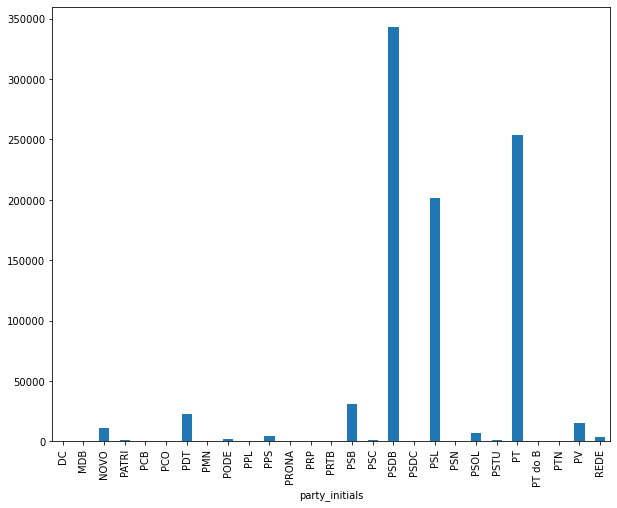

In [114]:
top_10_votes = top_10.groupby(["party_initials","municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
parties = top_10["party_initials"].unique()
top_10.groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar")
# top_10_votes.groupby(["municipality_name"]).plot(legend=True, grid=True, figsize=(20,10))

#### Now, let's look at trend over the past 4 elections
Here, we can see that the PSDB received the most votes in 2006-2014, but received very few votes in 2018 (in which the PSL received the most votes)

<AxesSubplot:title={'center':'2018'}, xlabel='party_initials'>

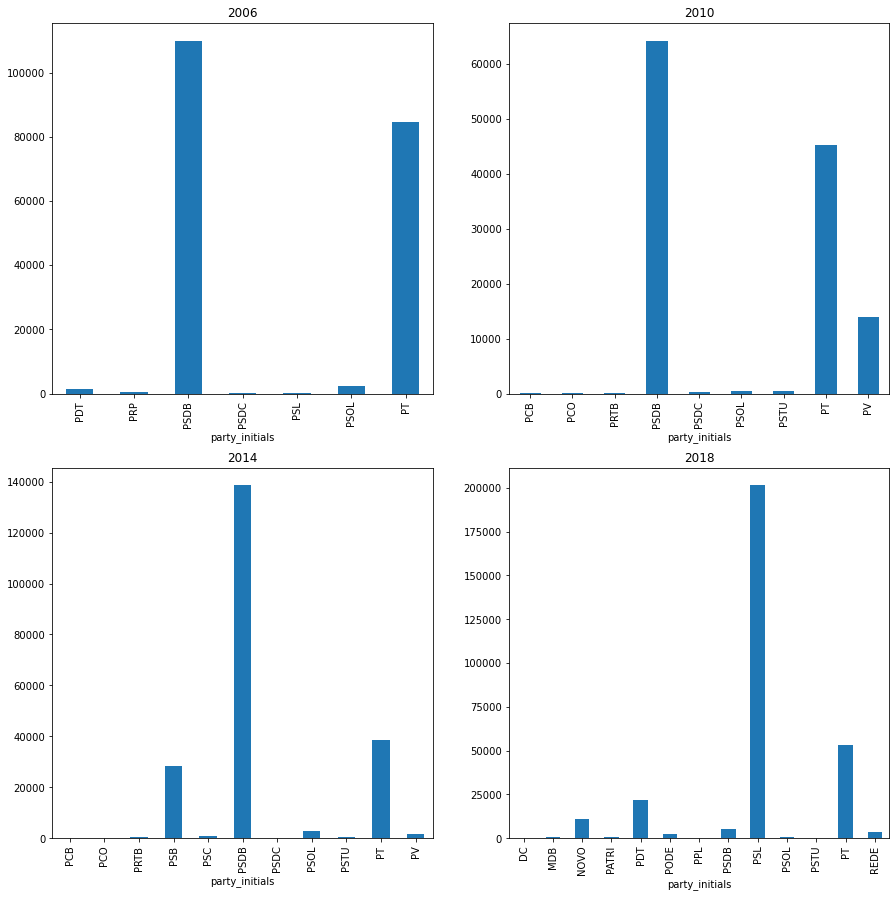

In [138]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

top_10[top_10["election_year"] == 2006].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][0], title="2006")
top_10[top_10["election_year"] == 2010].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][1], title="2010")
top_10[top_10["election_year"] == 2014].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][0], title="2014")
top_10[top_10["election_year"] == 2018].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][1], title="2018")


#### Now, let's look at votes for the individual countries in these years


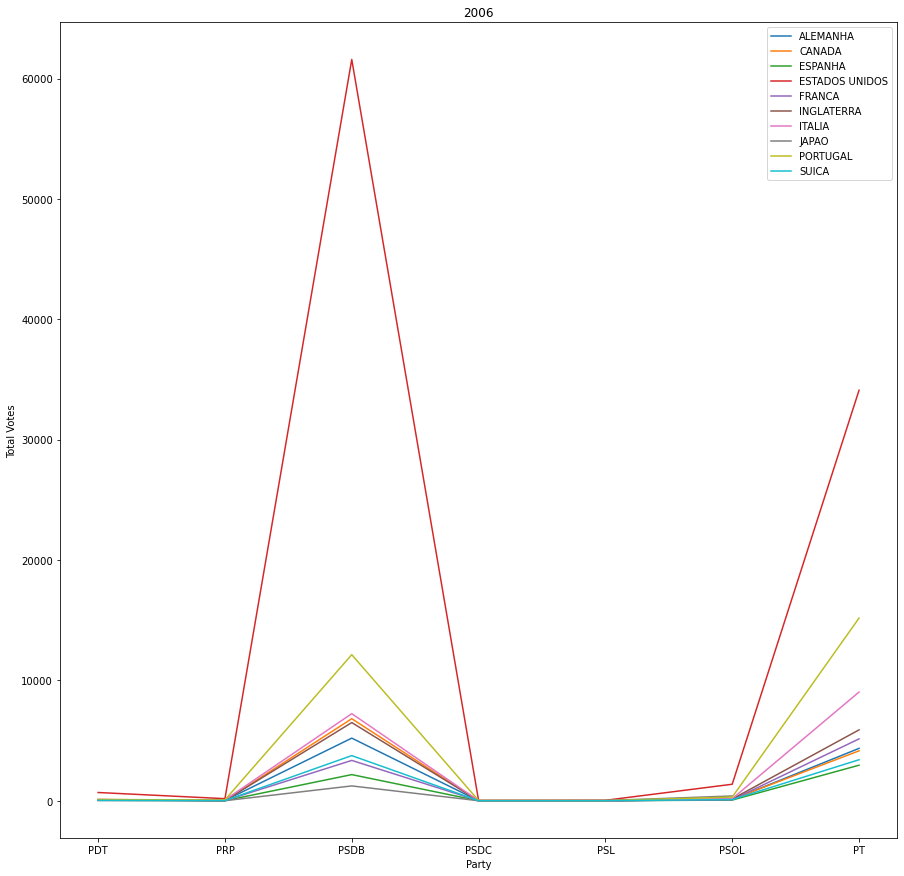

In [174]:
countries = top_10.municipality_name.unique()

#Set X Ticks
plt.xticks(range(0, top_10["party_initials"].nunique()), top_10["party_initials"].unique(), rotation=90)

#2006
for country in countries:
    top_10[(top_10["election_year"] == 2006) & (top_10["municipality_name"]==country)].groupby(["party_initials"]).number_of_votes.sum().plot(kind="line", label = country, legend=True, title="2006", figsize=(15,15), xlabel="Party", ylabel="Total Votes")


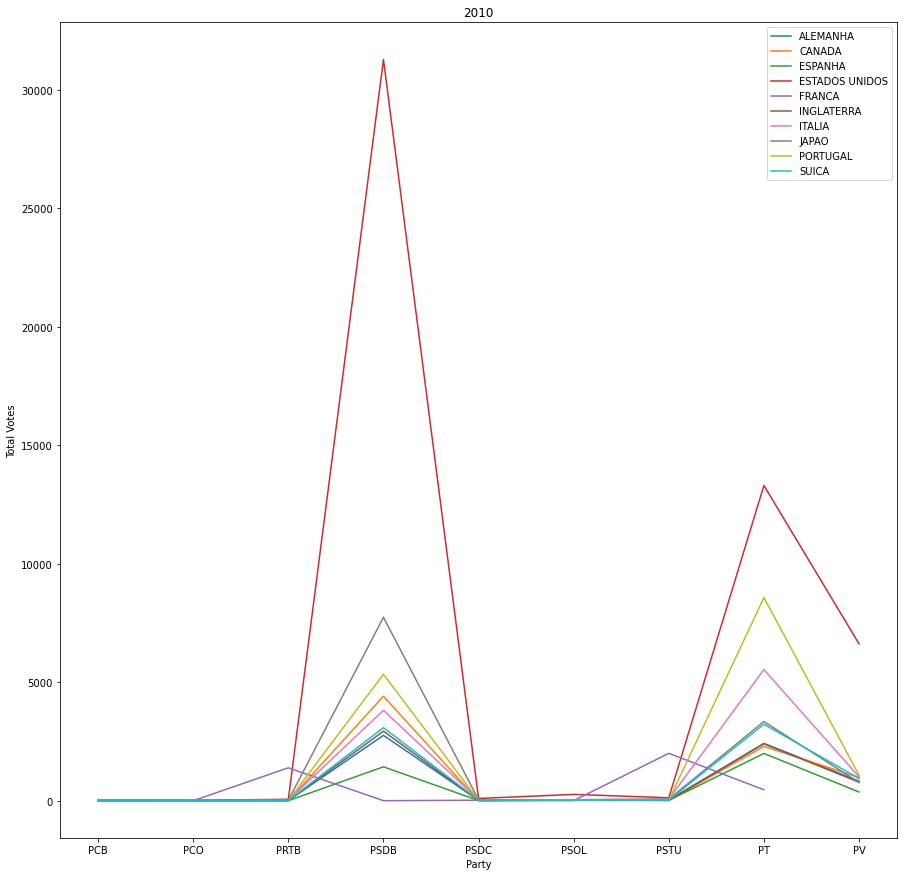

In [175]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
countries = top_10.municipality_name.unique()

#Set X Ticks
plt.xticks(range(0, top_10["party_initials"].nunique()), top_10["party_initials"].unique(), rotation=90)

#2010
for country in countries:
    top_10[(top_10["election_year"] == 2010) & (top_10["municipality_name"]==country)].groupby(["party_initials"]).number_of_votes.sum().plot(kind="line", label = country, legend=True, title="2010", figsize=(15,15), xlabel="Party", ylabel="Total Votes")

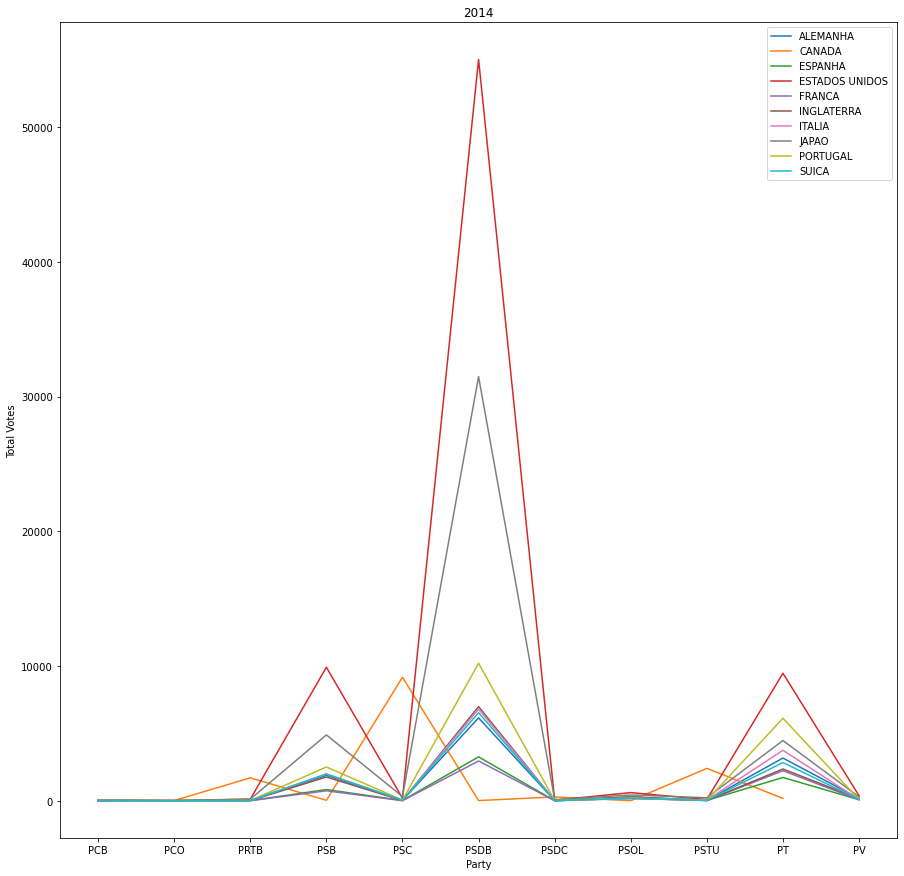

In [176]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
countries = top_10.municipality_name.unique()

#Set X Ticks
plt.xticks(range(0, top_10["party_initials"].nunique()), top_10["party_initials"].unique(), rotation=90)

#2014
for country in countries:
    top_10[(top_10["election_year"] == 2014) & (top_10["municipality_name"]==country)].groupby(["party_initials"]).number_of_votes.sum().plot(kind="line", label = country, legend=True, title="2014", figsize=(15,15), xlabel="Party", ylabel="Total Votes")

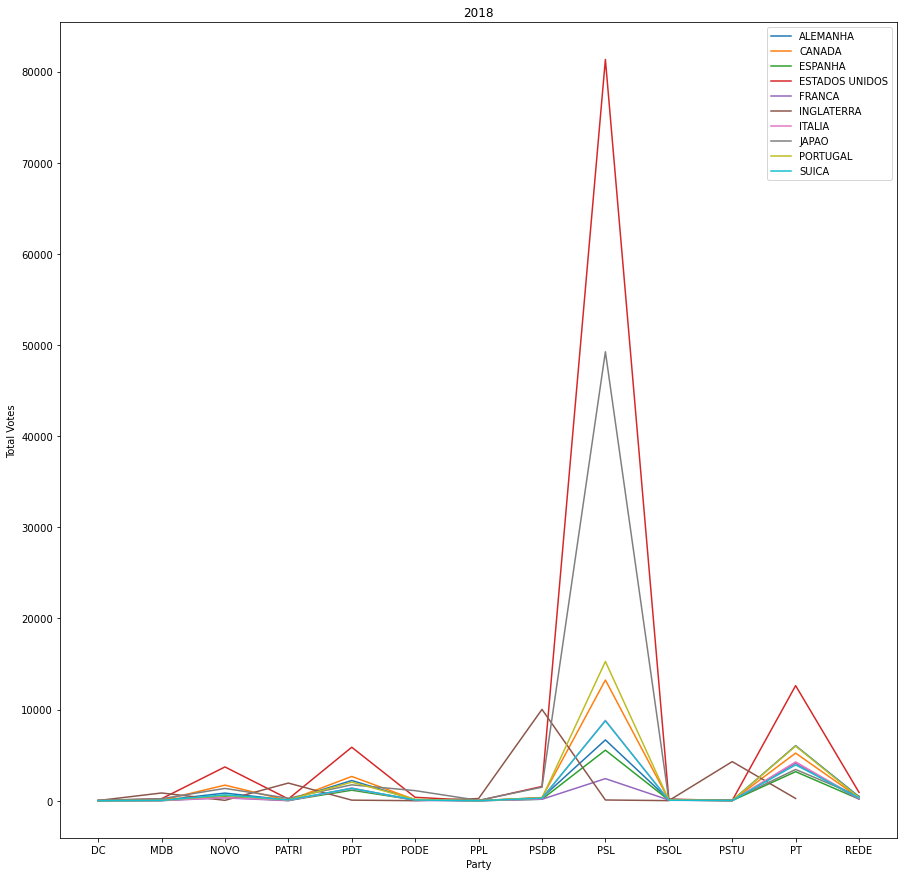

In [179]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
countries = top_10.municipality_name.unique()

#Set X Ticks
plt.xticks(range(0, top_10["party_initials"].nunique()), top_10["party_initials"].unique(), rotation=90)

#2018
for country in countries:
    top_10[(top_10["election_year"] == 2018) & (top_10["municipality_name"]==country)].groupby(["party_initials"]).number_of_votes.sum().plot(kind="line", label = country, legend=True, title="2018", figsize=(15,15), xlabel="Party", ylabel="Total Votes")